In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data=pd.read_csv("week2_result.csv")
data.dropna(inplace=True)
data

,Date,Pnb,upper,lower
13,2017-06-01,151.90,171.662353,137.344790
14,2017-06-02,153.05,169.154565,137.888292
15,2017-06-05,153.80,162.284631,141.851083
16,2017-06-06,149.50,157.974249,143.940037
17,2017-06-07,152.35,156.130289,144.905425
...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017
490,2019-05-08,83.95,93.474034,81.683108
491,2019-05-09,84.25,91.795738,81.989976
492,2019-05-10,86.25,89.958521,82.891479


In [38]:
data['mid']=(data['upper']+data['lower'])/2
data

,Date,Pnb,upper,lower,mid
13,2017-06-01,151.90,171.662353,137.344790,154.503571
14,2017-06-02,153.05,169.154565,137.888292,153.521429
15,2017-06-05,153.80,162.284631,141.851083,152.067857
16,2017-06-06,149.50,157.974249,143.940037,150.957143
17,2017-06-07,152.35,156.130289,144.905425,150.517857
...,...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017,88.250000
490,2019-05-08,83.95,93.474034,81.683108,87.578571
491,2019-05-09,84.25,91.795738,81.989976,86.892857
492,2019-05-10,86.25,89.958521,82.891479,86.425000


In [39]:
def buy(data):
    if data['Pnb'] < data['lower']:
        return "Buy"
    if (data['Pnb'] > data['lower']) & (data['Pnb'] < data['mid']):
        return "Hold Buy/ Liquidate Short"
    if (data['Pnb'] >data['mid']) & (data['Pnb'] < data['upper']):
        return "Hold Short/ Liquidate Buy"
    if data['Pnb'] > data['upper']:
        return "Short"
data= data.assign(Call = data.apply(buy, axis=1))
data.head(30)

,Date,Pnb,upper,lower,mid,Call
13,2017-06-01,151.90,171.662353,137.344790,154.503571,Hold Buy/ Liquidate Short
14,2017-06-02,153.05,169.154565,137.888292,153.521429,Hold Buy/ Liquidate Short
15,2017-06-05,153.80,162.284631,141.851083,152.067857,Hold Short/ Liquidate Buy
16,2017-06-06,149.50,157.974249,143.940037,150.957143,Hold Buy/ Liquidate Short
17,2017-06-07,152.35,156.130289,144.905425,150.517857,Hold Short/ Liquidate Buy
18,2017-06-08,151.30,155.199928,145.278644,150.239286,Hold Short/ Liquidate Buy
19,2017-06-09,152.15,155.379130,145.270870,150.325000,Hold Short/ Liquidate Buy
20,2017-06-12,148.40,155.380526,145.076617,150.228571,Hold Buy/ Liquidate Short
21,2017-06-13,148.75,155.301653,145.341204,150.321429,Hold Buy/ Liquidate Short
22,2017-06-14,152.00,155.472779,145.355793,150.414286,Hold Short/ Liquidate Buy


In [41]:
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()
train_X = data[['upper','lower','mid','Pnb']]
transfomed_label = label_e.fit_transform(data[['Call']])
train_Y = transfomed_label.reshape(-1,1)

In [42]:
# LOGISTIC REGRESSION
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

LogisticRegression = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LogisticRegression .predict(train_X) 
round(LogisticRegression .score(train_X,train_Y), 4)


0.9064

In [44]:
# RANDOM FOREST
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RandomForest= RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RandomForest.fit(train_X, train_Y.ravel())  
RandomForest.predict(train_X) 
round(RandomForest.score(train_X,train_Y), 4)

0.7089

In [54]:
# SUPPORT VECTOR MACHINE(SVM)
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y.ravel())
SVM.predict(train_X)
round(SVM.score(train_X,train_Y), 4)

C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5842

In [60]:
# NEURAL NETWORK
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1)  
NN.fit(train_X, train_Y.ravel())  
NN.predict(train_X)
round(NN.score(train_X, train_Y), 4)

0.8732

In [63]:
tcs_df=pd.read_csv("TCS.csv")

In [64]:
tcs_df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [65]:
tcs_df['%chg op_cl'] = ((tcs_df['Close Price'] - tcs_df['Open Price'])/(tcs_df['Close Price']))*100
tcs_df['%chg lw_hg'] = ((tcs_df['Close Price'] - tcs_df ['High Price'])/(tcs_df['Low Price']))*100
tcs_df['%chg 5dymean'] = tcs_df['Close Price'].pct_change().dropna().rolling(5).mean()
tcs_df['%chg 5dystd'] = tcs_df['Close Price'].pct_change().dropna().rolling(5).std()
tcs_df = tcs_df.dropna()
tcs_df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,TCS,EQ,22-May-2017,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27,0.843423,-0.892430,0.013799,0.017366
6,TCS,EQ,23-May-2017,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44,-0.456042,-1.688544,0.007620,0.016950
7,TCS,EQ,24-May-2017,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48,0.951488,-0.428913,0.008433,0.017235
8,TCS,EQ,25-May-2017,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67,1.813610,-0.504283,0.006962,0.014758
9,TCS,EQ,26-May-2017,2624.60,2625.00,2626.85,2564.65,2570.05,2578.25,2593.00,681275,1.766543e+09,32170,390827,57.37,-1.813245,-1.894995,0.005721,0.016812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,-0.376403,-1.514868,-0.007681,0.021018
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,0.085933,-0.711134,-0.009545,0.019441
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,1.268095,-0.540705,-0.003737,0.019911
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,-1.835378,-2.643648,0.000409,0.011442


In [75]:
arr = []
val = []
for value in tcs_df['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
tcs_df['Action'] = pd.DataFrame(val)
tcs_df= tcs_df.dropna()
tcs_df

C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,TCS,EQ,22-May-2017,2507.15,2510.0,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27,0.843423,-0.892430,0.013799,0.017366,-1.0
6,TCS,EQ,23-May-2017,2531.35,2533.2,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44,-0.456042,-1.688544,0.007620,0.016950,-1.0
7,TCS,EQ,24-May-2017,2521.70,2534.8,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48,0.951488,-0.428913,0.008433,0.017235,1.0
8,TCS,EQ,25-May-2017,2559.15,2577.0,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67,1.813610,-0.504283,0.006962,0.014758,1.0
9,TCS,EQ,26-May-2017,2624.60,2625.0,2626.85,2564.65,2570.05,2578.25,2593.00,681275,1.766543e+09,32170,390827,57.37,-1.813245,-1.894995,0.005721,0.016812,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,TCS,EQ,10-Apr-2019,2091.50,2083.0,2085.50,2036.00,2043.65,2040.25,2053.91,3313062,6.804718e+09,168190,1821699,54.99,-2.095331,-2.222495,-0.003582,0.022414,1.0
479,TCS,EQ,11-Apr-2019,2040.25,2045.0,2055.00,2013.65,2025.00,2019.50,2028.47,3422442,6.942309e+09,133153,1568180,45.82,-1.262689,-1.762968,0.000617,0.017350,-1.0
480,TCS,EQ,12-Apr-2019,2019.50,2038.0,2039.00,2007.00,2013.05,2014.50,2019.97,3198471,6.460808e+09,126989,1040440,32.53,-1.166543,-1.220727,-0.003234,0.014818,1.0
481,TCS,EQ,15-Apr-2019,2014.50,2070.0,2119.80,2041.00,2113.00,2113.30,2086.02,9189201,1.916886e+10,282918,3402175,37.02,2.048928,-0.318471,0.004383,0.027927,1.0


In [81]:
from sklearn import preprocessing
train_X = tcs_df[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = tcs_df[['Action']]
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
x=RF.predict(train_X) 
x

Random Forests


C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1

In [82]:
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


0.6464

C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


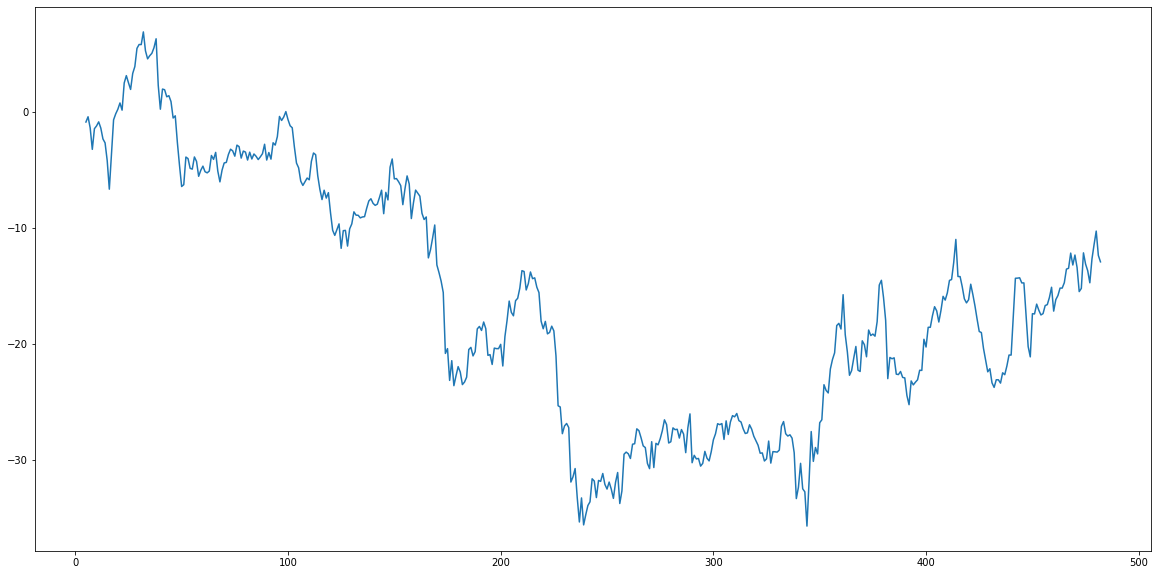

In [80]:
tcs_df['Net Cummulative Returns'] = (((tcs_df['Open Price'] - tcs_df['Close Price'])/(tcs_df['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(tcs_df['Net Cummulative Returns'])